## Wrapper Methods for Feature Selection: Obesity Prediction

This project demonstrates how wrapper methods can be used to streamline predictive modeling while maintaining accuracy. Using data from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+), which includes self-reported lifestyle and dietary factors, I trained a logistic regression model to classify individuals as obese or not.

To enhance interpretability and reduce model complexity, I applied three wrapper-based feature selection techniques: Sequential Forward Selection, Sequential Backward Selection, and Recursive Feature Elimination. Each approach was evaluated against the baseline model using all features, revealing how a smaller, well-chosen subset of predictors can achieve comparable performance. This process highlights the value of feature selection in building more efficient, transparent, and generalizable models.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.pipeline import make_pipeline

## Evaluating a Logistic Regression Model

The data set `obesity` contains 18 predictor variables. Here's a brief description of them.

* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0`.

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not.

In [2]:
# https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

# Load the data
obesity = pd.read_csv("obesity.csv")

# Inspect the data
obesity.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,0,0,0,1,0,0
1,0,21.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,0,0,0,1,0,0
2,1,23.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,0,0,0,1,0,0
3,1,27.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,0,0,0,0,1,0
4,1,22.0,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,0,0,0,1,0,0


### Splitting Features and Target

To prepare the dataset for modeling, I separated the predictor variables (`X`) from the target variable (`y`). This step ensures a clean structure for training the logistic regression model and evaluating its performance on the task of obesity classification.

.

In [3]:
X = obesity.drop(columns = 'NObeyesdad')
X

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0


In [4]:
y = obesity['NObeyesdad']
y

0       0
1       0
2       0
3       0
4       0
       ..
2106    1
2107    1
2108    1
2109    1
2110    1
Name: NObeyesdad, Length: 2111, dtype: int64

In [5]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

### Logistic regression model

In [6]:
lr = LogisticRegression(max_iter=1000)

In [7]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

A logistic regression model was initialized and trained using the prepared dataset. The `max_iter=1000` parameter ensures convergence during optimization. This model serves as the baseline for evaluating how well all features predict obesity status.



### Evaluating Model Accuracy

The accuracy of the logistic regression model was assessed using the `.score()` method, which calculates the proportion of correctly classified instances. This metric provides a baseline performance measure before applying feature selection techniques.

In [8]:
print("Baseline training accuracy:", lr.score(X_train, y_train))
print("Baseline test accuracy:", lr.score(X_test, y_test))

Baseline training accuracy: 0.7760663507109005
Baseline test accuracy: 0.7399527186761229


## Sequential Forward Selection

With the baseline logistic regression model in place, the next step is to identify the most relevant subset of features using sequential forward selection. A new selection model (`sfs`) is configured using `lr` as the estimator, with `forward=True`, `floating=False`, and key parameters set to `k_features=9`, `scoring='accuracy'`, and `cv=0`. This approach iteratively adds features that improve model performance.

In [9]:
sfs = SFS(estimator = lr, forward = True, floating =  False, k_features=9, scoring='accuracy', cv=0)

In [10]:
sfs.fit(X_train,y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(9, 9), scoring='accuracy')

### Review the Results

After running sequential forward selection on the logistic regression model, we can examine which features were selected and how the reduced feature set impacts model accuracy. The output stored in `sfs.subsets_[9]` provides both the selected features and the corresponding performance metrics.

In [11]:
sfs.subsets_[9]

{'feature_idx': (0, 1, 2, 3, 6, 9, 10, 14, 17),
 'cv_scores': array([0.78909953]),
 'avg_score': 0.7890995260663507,
 'feature_names': ('Gender',
  'Age',
  'family_history_with_overweight',
  'FAVC',
  'CAEC',
  'SCC',
  'FAF',
  'Bike',
  'Walking')}

In [12]:
print("SFS selected features:", sfs.subsets_[9]['feature_names'])

SFS selected features: ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Bike', 'Walking')


In [13]:
print("SFS training accuracy:", sfs.subsets_[9]['avg_score'])

SFS training accuracy: 0.7890995260663507


In [14]:
print("SFS test accuracy:", lr.fit(X_train[list(sfs.subsets_[9]['feature_names'])], y_train).score(X_test[list(sfs.subsets_[9]['feature_names'])], y_test))

SFS test accuracy: 0.75177304964539


### Visualize Model Performance

To better understand how model accuracy evolves as features are incrementally added, we can visualize the results of sequential forward selection. Using `plot_sfs(sfs.get_metric_dict())`, we generate a plot showing accuracy as a function of the number of selected features. This helps assess the trade-off between feature count and model performance.

C:\Users\stoic\anaconda3\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\stoic\anaconda3\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


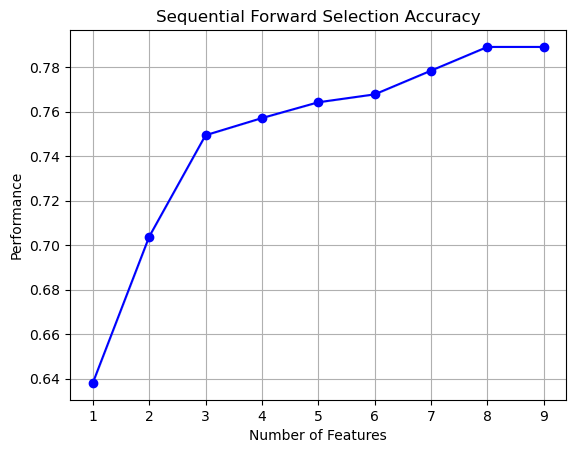

In [15]:
plot_sfs(sfs.get_metric_dict())
plt.title("Sequential Forward Selection Accuracy")
plt.grid()
plt.show()

## Sequential Backward Selection

After observing the performance of sequential forward selection, we now turn to an alternative wrapper method—sequential backward selection—to compare results. We'll define a model sbs that starts with the full feature set and iteratively removes features to identify an optimal subset. The model is configured with `estimator=lr`, `forward=False`, `floating=False`, `k_features=7`, `scoring='accuracy'`, and `cv=0`.

In [16]:
sbs = SFS(estimator = lr, forward = False, floating =  False, k_features=7, scoring='accuracy', cv=0)

In [17]:
sbs.fit(X_train, y_train)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(7, 7), scoring='accuracy')

### Review the Selected Features

After fitting the sequential backward selection model on the logistic regression setup with `X` and `y`, we can now review the selected subset of features and assess how well the model performs with them. Access `sbs.subsets_[7]` to examine which variables were retained and evaluate the associated model accuracy.

In [18]:
sbs.subsets_[7]

{'feature_idx': (1, 2, 3, 4, 6, 9, 16),
 'cv_scores': array([0.77014218]),
 'avg_score': 0.7701421800947867,
 'feature_names': ('Age',
  'family_history_with_overweight',
  'FAVC',
  'FCVC',
  'CAEC',
  'SCC',
  'Public_Transportation')}

In [19]:
print("SBS selected features:", sbs.subsets_[7]['feature_names'])

SBS selected features: ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')


In [20]:
print("SBS training accuracy:", sbs.subsets_[7]['avg_score'])

SBS training accuracy: 0.7701421800947867


In [21]:
print("SBS test accuracy:", lr.fit(X_train[list(sbs.subsets_[7]['feature_names'])], y_train).score(X_test[list(sbs.subsets_[7]['feature_names'])], y_test))

SBS test accuracy: 0.7399527186761229


### Visualize Model Accuracy

To better understand how model performance evolves as features are removed, generate a plot of accuracy versus the number of selected features using `plot_sfs(sbs.get_metric_dict())`. This visualization highlights the impact of sequential backward selection on model accuracy.

C:\Users\stoic\anaconda3\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\stoic\anaconda3\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


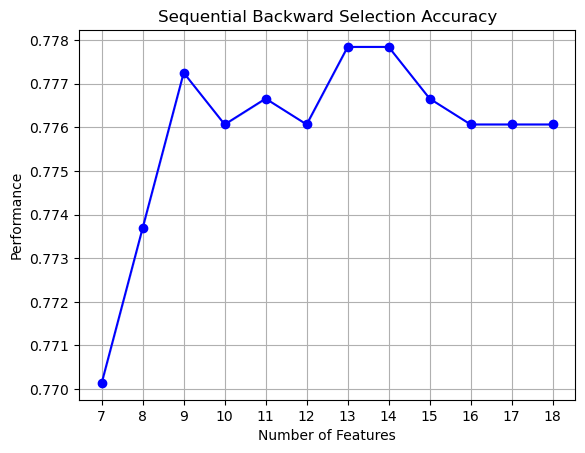

In [22]:
plot_sfs(sbs.get_metric_dict())
plt.title("Sequential Backward Selection Accuracy")
plt.grid()
plt.show()

## Recursive Feature Elimination

To further refine the feature selection process, I applied recursive feature elimination (RFE) alongside standardization to ensure consistent variable scaling. This method systematically removed less informative predictors, ultimately identifying a subset of features that preserved high model performance while improving interpretability.


In [23]:
features = X.columns

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
rfe = RFE(estimator=lr, n_features_to_select=8)

In [26]:
rfe.fit(X_train_scaled, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=8)

### Interpreting Selected Features

After fitting the RFE model, I identified the most impactful predictors retained through the elimination process. This refined feature set highlights which variables contributed most significantly to the model's predictive power, offering clearer insights into the drivers of obesity classification.


In [27]:
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print("RFE selected features:", rfe_features)

RFE selected features: ['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']


In [28]:
print("RFE test accuracy:", rfe.score(X_test_scaled, y_test))

RFE test accuracy: 0.7375886524822695


## Final Evaluation: Comparing Feature Selection Strategies

To assess the trade-off between model simplicity and predictive performance, I compared the test accuracy of logistic regression models trained using four different feature configurations:

- **All Features**: Baseline model using the full feature set.  
- **Sequential Forward Selection (SFS)**: Iteratively adds features that improve model accuracy, stopping at 9 features.  
- **Sequential Backward Selection (SBS)**: Starts with all features and removes the least impactful ones, retaining 7.  
- **Recursive Feature Elimination (RFE)**: Eliminates features based on model coefficients, retaining the 8 most informative variables (with data standardized).  

Each model was trained and evaluated on holdout test data using a consistent logistic regression setup. The results are summarized below in a comparison table and accompanying bar plot. This provides a clear view of how much model complexity can be reduced without significantly sacrificing accuracy.

By benchmarking all methods side by side, this final analysis highlights the effectiveness of wrapper methods in optimizing both performance and interpretability — key considerations when designing robust predictive systems.


In [29]:
# Baseline full feature model
base_lr = LogisticRegression(max_iter=1000)
baseline_model = LogisticRegression(max_iter=1000)
baseline_model.fit(X_train, y_train)
baseline_score = baseline_model.score(X_test, y_test)

In [30]:
# SFS model and accuracy
sfs_features = list(sfs.subsets_[9]['feature_names'])
sfs_model = LogisticRegression(max_iter=1000)
sfs_model.fit(X_train[sfs_features], y_train)
sfs_score = sfs_model.score(X_test[sfs_features], y_test)

In [31]:
# SBS model and accuracy
sbs_features = list(sbs.subsets_[7]['feature_names'])
sbs_model = LogisticRegression(max_iter=1000)
sbs_model.fit(X_train[sbs_features], y_train)
sbs_score = sbs_model.score(X_test[sbs_features], y_test)

In [32]:
# RFE model and accuracy (remember: data was standardized!)
rfe_pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
rfe_pipeline.fit(X_train[rfe_features], y_train)
rfe_score = rfe_pipeline.score(X_test[rfe_features], y_test)

In [33]:
# Summary table
summary = pd.DataFrame({
    "Method": ["All Features", "SFS", "SBS", "RFE"],
    "Test Accuracy": [baseline_score, sfs_score, sbs_score, rfe_score],
    "Num Features": [X.shape[1], len(sfs_features), len(sbs_features), len(rfe_features)]
})

print(summary)

         Method  Test Accuracy  Num Features
0  All Features       0.739953            18
1           SFS       0.751773             9
2           SBS       0.739953             7
3           RFE       0.737589             8


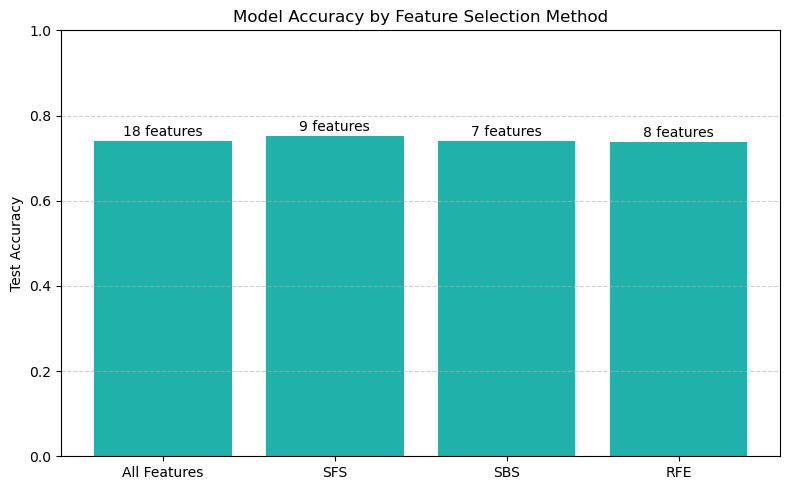

In [34]:
# Plot
plt.figure(figsize=(8, 5))
bars = plt.bar(summary["Method"], summary["Test Accuracy"], color="lightseagreen")
plt.ylabel("Test Accuracy")
plt.title("Model Accuracy by Feature Selection Method")

# Annotate bars with feature counts
for bar, n in zip(bars, summary["Num Features"]):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
             f"{n} features", ha='center', va='bottom')

plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### Interpreting the Final Results

The comparison plot above summarizes the test accuracy of logistic regression models trained using different feature selection strategies.

- **All Features**: The baseline model used all 18 features and achieved a test accuracy of approximately **0.74**. This serves as our reference point for evaluating the impact of dimensionality reduction.
  
- **Sequential Forward Selection (SFS)**: Retaining just **9 features**, this method slightly improved model accuracy to **0.75**, demonstrating that a leaner model can sometimes outperform a full-featured one. This suggests that some of the original features may introduce noise or redundancy.

- **Sequential Backward Selection (SBS)**: With **7 features**, this approach matched the full model’s accuracy (**0.74**) while using less than half the input variables. This reinforces the idea that well-targeted feature pruning can preserve performance while improving model simplicity.

- **Recursive Feature Elimination (RFE)**: Selected **8 features** and achieved a slightly lower accuracy of **0.74** compared to the other methods. However, it still remained within a narrow range of performance, suggesting reasonable robustness.

### Conclusion

All three wrapper methods successfully reduced the number of input variables while maintaining comparable predictive performance to the full model. Notably, SFS provided the best balance of accuracy and feature economy in this case.

This analysis reinforces the value of wrapper-based feature selection for developing interpretable, efficient models without compromising accuracy — a critical consideration in practical machine learning workflows.
